In [97]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/kc_house_data.csv")

# Step 1: Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
# Step 2: Drop duplicate rows (if any)
df = df.drop_duplicates()

# Step 3: Replace 0 in 'yr_renovated' with NaN to indicate 'not renovated'
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)


df = df[(df["bedrooms"].between(1, 20)) &
        (df["bathrooms"].between(1, 10)) &
        (df["floors"].between(1, 10)) &
        (df["grade"].between(1, 13)) &
        (df["view"].between(0, 4)) &
        (df["condition"].between(1, 5))]

df = df[df["sqft_above"] + df["sqft_basement"].fillna(0) == df["sqft_living"]]
df = df[df['sqft_lot'] < df['sqft_lot'].quantile(0.995)]
df = df[df['price'] < df['price'].quantile(0.995)]



# Step 5: Drop irrelevant columns (e.g., 'id', 'zipcode')
df_cleaned = df.drop(columns=['id', 'zipcode'])


# Optionally, save the cleaned dataset
df_cleaned.to_csv("kc_house_data_cleaned.csv", index=False)

# Replace NaN in 'yr_renovated' with 0 (not renovated)
df_cleaned['yr_renovated'] = df_cleaned['yr_renovated'].fillna(0)

# Convert to binary: 1 if renovated, 0 if not
df_cleaned['yr_renovated'] = df_cleaned['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)
df_cleaned['bathrooms'] = df_cleaned['bathrooms'].round()
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].round()
df_cleaned['floors'] = df_cleaned['floors'].round()

df_cleaned['house_age'] = 2025 - df_cleaned['yr_built']
df_cleaned['price_per_sqft'] = df_cleaned['price'] / df_cleaned['sqft_living']



In [98]:
df_cleaned.head(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,price_per_sqft
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,70,188.050847
1,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,2170,400,1951,1,47.7210,-122.319,1690,7639,74,209.338521
2,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,92,233.766234
3,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,60,308.163265
4,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,38,303.571429
5,2014-05-12,1225000.0,4,4.0,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,47.6561,-122.005,4760,101930,24,226.014760
6,2014-06-27,257500.0,3,2.0,1715,6819,2.0,0,0,3,...,1715,0,1995,0,47.3097,-122.327,2238,6819,30,150.145773
7,2015-01-15,291850.0,3,2.0,1060,9711,1.0,0,0,3,...,1060,0,1963,0,47.4095,-122.315,1650,9711,62,275.330189
8,2015-04-15,229500.0,3,1.0,1780,7470,1.0,0,0,3,...,1050,730,1960,0,47.5123,-122.337,1780,8113,65,128.932584
9,2015-03-12,323000.0,3,2.0,1890,6560,2.0,0,0,3,...,1890,0,2003,0,47.3684,-122.031,2390,7570,22,170.899471


In [137]:
x=df_cleaned[['bedrooms'	,'bathrooms',	'sqft_living'	,'sqft_lot',	'floors',	'grade', 'lat', 'long','price_per_sqft', 'house_age']]
y=df_cleaned['price']

In [138]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create model
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Train model
model.fit(x_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(x_test)

In [140]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 8212563781.859608
R2 Score: 0.911386752981757


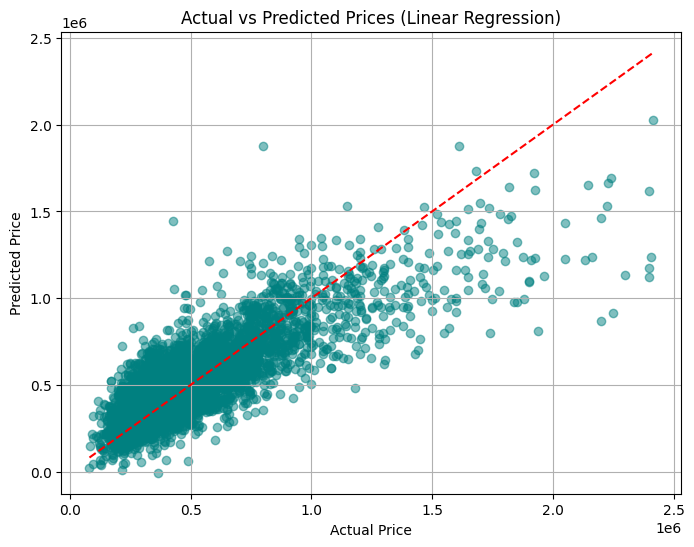

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.show()
